
# ASSIGNED Coupled reaction and transport



The governing equation for steady state one-dimensional transport of a species with both reaction and flow is given below.  The concentration of the species, $C(z)$, depends on the diffusivity, $D$, local fluid velocity, $\nu$ , and reaction rate constant, $k$.  This is valid over the range  $0 \le z \le L$.

$D \frac{d^2C}{dz^2} + \nu \frac{dC}{dz} - kC^n=0$

Here is a schematic of this system.

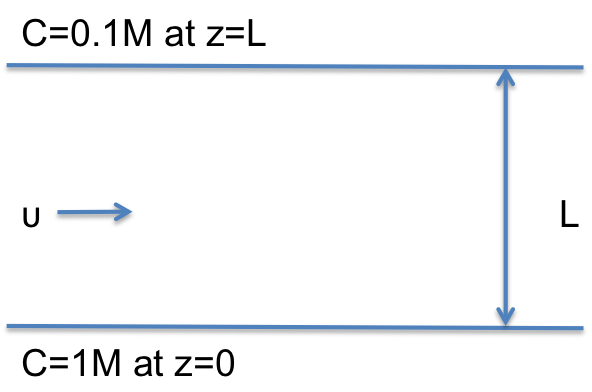

Assume the reaction is first order (n=1) and plot the concentration profile C(z\*) where z\* = z / L using solve\_bvp to get the solution.

The boundary conditions are:
C(0) = 1M and C(L) = 0.1M.

Here are some relevant constants:

||value|
|---
|D|10 μm^2/sec|
|L|1 mm|
|ν|0.1 μm/sec|
|k|5 x 10<sup>-3</sup> sec<sup>-1</sup>|




## Solution



Define $c1 = C$

$c1' = C'$

$c2 = c1'$

$c2' = C''$

$c1' = c2$

$D c2' + \nu c2 - kC = 0$

so:

$c2' = 1 / D * (k c1 - \nu c2)$



Text(0.5,0,'z*[-]')

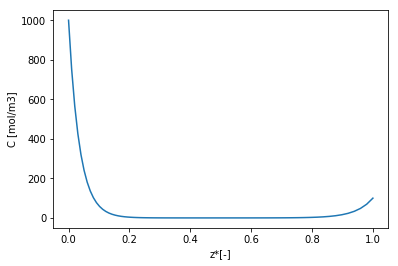

In [3]:
import numpy as np
from scipy.integrate import solve_bvp

L = 1e-3 # m
nu = 0.1e-6 # m / sec
k = 5e-3 # 1 / s
D = 10e-12 # m^2/sec

def bvp(z, C):
    c1, c2 = C
    dc1dz = c2
    dc2dz = 1 / D * (k * c1 - nu * c2)
    return dc1dz, dc2dz

def bc(Ca, Cb):
    c1a, c2a = Ca
    c1b, c2b = Cb
    return [c1a - 1e3,
            c1b - 0.1e3]

Z = np.linspace(0, L)

lp = np.polyfit([0, L], [1e3, 0.1e3], 1)
c1 = np.polyval(lp, Z)
c2 = np.ones(c1.shape)

Cguess = [c1, c2]

sol = solve_bvp(bvp, bc, Z, Cguess)
sol.message

%matplotlib inline
import matplotlib.pyplot as plt

plt.plot(sol.x / L, sol.y[0])
plt.ylabel('C [mol/m3]')
plt.xlabel('z*[-]')